In [30]:
import numpy as np
import pandas as pd
import snscrape.modules.twitter as sntwitter
from tqdm import tqdm   
import warnings
from deep_translator import GoogleTranslator
import preprocessor as p
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split


In [2]:
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth',None)
warnings.filterwarnings("ignore")
tqdm.pandas()

In [3]:
multipleSclerosis=['cladribine','mavenclad','aubagio','teriflunomide','tecfidera',
                   'dimethyl fumarate','dimethylfumarate',
                   'gilenya','fingolimod','mayzent','siponimod','tysabri',
                   'natalizumab','ocrevus','ocrelizumab','lemtrada','alemtuzumab']

lupus = ['prednisone','azathioprine', 'methylprednisolone','belimumab','Benlysta','cyclophosphamide',
               'lupkynis','mycophenolate','mofetil','voclosporin']

dateRange   = ' since:2018-01-01 until:2022-05-01'
maxTweets = 20000

In [4]:
def pullDataUsingSnscrape(searchTerms,log=''):
    tweetsList = []
    print(searchTerms)
    for drug in searchTerms:
        if log == 'X':
            print(drug)
        searchQuery = drug + dateRange
        for i,tweet in tqdm(enumerate(sntwitter.TwitterSearchScraper(searchQuery).get_items())):
            if i > maxTweets:
                break
            tweetsList.append([tweet.date, tweet.id, tweet.content, tweet.content.encode("utf-8"), tweet.user.username, tweet, tweet.lang, drug])
    return tweetsList
    
def convertToDataFrame(searchResults):
    return pd.DataFrame(searchResults, columns=['Datetime', 'TweetId', 'Text', 'EncodedText', 'Username', 'Tweet', 'Language','Drug'])
    
def printData(text,df):
    print(text, len(df))

In [5]:
df_ms_list = pullDataUsingSnscrape(multipleSclerosis,log='X')

['cladribine', 'mavenclad', 'aubagio', 'teriflunomide', 'tecfidera', 'dimethyl fumarate', 'dimethylfumarate', 'gilenya', 'fingolimod', 'mayzent', 'siponimod', 'tysabri', 'natalizumab', 'ocrevus', 'ocrelizumab', 'lemtrada', 'alemtuzumab']
cladribine


418it [00:10, 45.07it/s]Could not find key tcooutlinks
1262it [00:27, 49.90it/s]Could not find card URL in tcooutlinks
1282it [00:28, 50.28it/s]Could not find card URL in tcooutlinks
1362it [00:30, 45.62it/s]Could not find card URL in tcooutlinks
1762it [00:38, 47.23it/s]Could not find card URL in tcooutlinks
2142it [00:46, 50.65it/s]Could not find key tcooutlinks
2398it [00:52, 46.30it/s]Could not find key tcooutlinks
2418it [00:52, 45.84it/s]Could not find key tcooutlinks
Could not find key tcooutlinks
2749it [01:00, 45.66it/s]


mavenclad


381it [00:08, 51.31it/s]Could not find key tcooutlinks
1012it [00:22, 47.79it/s]Could not find card URL in tcooutlinks
1032it [00:22, 47.93it/s]Could not find card URL in tcooutlinks
1152it [00:25, 46.92it/s]Could not find key tcooutlinks
2640it [00:57, 46.00it/s]


aubagio


487it [00:11, 43.65it/s]Could not find key tcooutlinks
1692it [00:35, 55.28it/s]Could not find card URL in tcooutlinks
1812it [00:37, 46.53it/s]Could not find card URL in tcooutlinks
1852it [00:38, 47.51it/s]Could not find key tcooutlinks
2392it [00:49, 48.89it/s]Could not find key tcooutlinks
2672it [00:55, 49.50it/s]Could not find key tcooutlinks
2905it [01:00, 48.20it/s]


teriflunomide


19it [00:01, 18.19it/s]Could not find card URL in tcooutlinks
38it [00:01, 28.58it/s]Could not find key tcooutlinks
190it [00:05, 44.25it/s]Could not find key tcooutlinks
209it [00:05, 43.38it/s]Could not find key tcooutlinks
Could not find key tcooutlinks
249it [00:06, 46.58it/s]Could not find key tcooutlinks
269it [00:06, 46.51it/s]Could not find key tcooutlinks
Could not find key tcooutlinks
285it [00:07, 39.83it/s]Could not find key tcooutlinks
457it [00:11, 43.93it/s]Could not find key tcooutlinks
Could not find key tcooutlinks
497it [00:11, 48.03it/s]Could not find key tcooutlinks
777it [00:17, 48.88it/s]Could not find key tcooutlinks
817it [00:18, 49.25it/s]Could not find card URL in tcooutlinks
1002it [00:22, 45.45it/s]Could not find key tcooutlinks
1289it [00:28, 44.69it/s]


tecfidera


1746it [00:37, 48.81it/s]Could not find key tcooutlinks
2526it [00:54, 48.61it/s]Could not find key tcooutlinks
3525it [01:15, 44.48it/s]Could not find card URL in tcooutlinks
6068it [02:10, 46.46it/s]


dimethyl fumarate


124it [00:03, 38.18it/s]Could not find key tcooutlinks
221it [00:06, 41.31it/s]Could not find key tcooutlinks
1845it [00:40, 45.18it/s]


dimethylfumarate


113it [00:02, 38.24it/s]


gilenya


1195it [00:25, 44.68it/s]Could not find key tcooutlinks
Could not find key tcooutlinks
2305it [00:48, 47.87it/s]Could not find card URL in tcooutlinks
3585it [01:16, 45.81it/s]Could not find key tcooutlinks
3725it [01:19, 44.75it/s]Could not find key tcooutlinks
3765it [01:20, 42.09it/s]Could not find key tcooutlinks
3785it [01:20, 43.14it/s]Could not find key tcooutlinks
3805it [01:21, 41.38it/s]Could not find key tcooutlinks
3825it [01:21, 41.48it/s]Could not find key tcooutlinks
3845it [01:22, 43.49it/s]Could not find key tcooutlinks
5480it [01:58, 46.43it/s]


fingolimod


209it [00:05, 40.06it/s]Could not find key tcooutlinks
326it [00:08, 42.64it/s]Could not find key tcooutlinks
Could not find key tcooutlinks
539it [00:13, 42.52it/s]Could not find key tcooutlinks
1730it [00:39, 47.97it/s]Could not find key tcooutlinks
Could not find key tcooutlinks
3624it [01:21, 41.36it/s]Could not find key tcooutlinks
3644it [01:22, 40.70it/s]Could not find key tcooutlinks
Could not find key tcooutlinks
3664it [01:22, 42.65it/s]Could not find key tcooutlinks
Could not find key tcooutlinks
Could not find key tcooutlinks
4023it [01:30, 41.97it/s]Could not find key tcooutlinks
Could not find key tcooutlinks
Could not find key tcooutlinks
4947it [01:50, 44.65it/s]


mayzent


180it [00:04, 47.23it/s]Could not find key tcooutlinks
599it [00:13, 45.19it/s]Could not find key tcooutlinks
919it [00:20, 46.91it/s]Could not find key tcooutlinks
1139it [00:25, 40.66it/s]Could not find key tcooutlinks
Could not find key tcooutlinks
1319it [00:28, 47.47it/s]Could not find key tcooutlinks
1489it [00:32, 46.25it/s]


siponimod


121it [00:03, 44.56it/s]Could not find key tcooutlinks
649it [00:14, 39.83it/s]Could not find key tcooutlinks
Could not find key tcooutlinks
Could not find key tcooutlinks
1449it [00:31, 47.51it/s]Could not find key tcooutlinks
Could not find key tcooutlinks
Could not find key tcooutlinks
1629it [00:35, 45.74it/s]Could not find key tcooutlinks
1709it [00:37, 43.09it/s]Could not find key tcooutlinks
Could not find key tcooutlinks
1729it [00:38, 41.23it/s]Could not find key tcooutlinks
1749it [00:38, 39.87it/s]Could not find key tcooutlinks
1769it [00:39, 40.06it/s]Could not find key tcooutlinks
2337it [00:51, 45.32it/s]


tysabri


1655it [00:35, 49.33it/s]Could not find card URL in tcooutlinks
3914it [01:21, 48.40it/s]Could not find card URL in tcooutlinks
Could not find card URL in tcooutlinks
4494it [01:33, 46.14it/s]Could not find key tcooutlinks
4514it [01:33, 47.56it/s]Could not find key tcooutlinks
5194it [01:48, 48.14it/s]Could not find key tcooutlinks
6134it [02:07, 47.34it/s]Could not find key tcooutlinks
6434it [02:14, 47.94it/s]Could not find card URL in tcooutlinks
7647it [02:41, 47.30it/s]


natalizumab


61it [00:01, 39.91it/s]Could not find key tcooutlinks
277it [00:06, 49.49it/s]Could not find key tcooutlinks
297it [00:06, 48.38it/s]Could not find key tcooutlinks
317it [00:07, 45.52it/s]Could not find key tcooutlinks
377it [00:08, 48.16it/s]Could not find key tcooutlinks
551it [00:12, 42.31it/s]Could not find key tcooutlinks
Could not find key tcooutlinks
Could not find key tcooutlinks
747it [00:17, 45.17it/s]Could not find key tcooutlinks
920it [00:21, 43.95it/s]Could not find card URL in tcooutlinks
Could not find key tcooutlinks
1139it [00:25, 46.05it/s]Could not find key tcooutlinks
Could not find key tcooutlinks
1259it [00:28, 47.20it/s]Could not find key tcooutlinks
1919it [00:42, 45.88it/s]Could not find key tcooutlinks
2079it [00:45, 48.78it/s]Could not find key tcooutlinks
2179it [00:47, 47.38it/s]Could not find key tcooutlinks
2199it [00:48, 45.25it/s]Could not find card URL in tcooutlinks
2576it [00:56, 46.10it/s]Could not find key tcooutlinks
2735it [01:00, 45.18it/s]Coul

ocrevus


879it [00:18, 43.61it/s]Could not find key tcooutlinks
Could not find key tcooutlinks
Could not find key tcooutlinks
899it [00:18, 45.68it/s]Could not find key tcooutlinks
919it [00:19, 47.38it/s]Could not find key tcooutlinks
2473it [00:51, 49.44it/s]Could not find key tcooutlinks
Could not find key tcooutlinks
3133it [01:05, 49.29it/s]Could not find key tcooutlinks
4137it [01:26, 48.98it/s]Could not find key tcooutlinks
4237it [01:28, 46.53it/s]Could not find key tcooutlinks
5035it [01:44, 54.10it/s]Could not find key tcooutlinks
6113it [02:06, 50.26it/s]Could not find key tcooutlinks
6706it [02:18, 51.35it/s]Could not find key tcooutlinks
7289it [02:31, 42.55it/s]Could not find key tcooutlinks
7309it [02:32, 44.51it/s]Could not find key tcooutlinks
8328it [02:53, 47.41it/s]Could not find card URL in tcooutlinks
8428it [02:55, 50.32it/s]Could not find card URL in tcooutlinks
10164it [03:31, 44.83it/s]Could not find key tcooutlinks
10544it [03:39, 45.36it/s]Could not find card URL in 

ocrelizumab


181it [00:04, 44.61it/s]Could not find key tcooutlinks
Could not find key tcooutlinks
479it [00:10, 47.91it/s]Could not find key tcooutlinks
597it [00:13, 44.44it/s]Could not find key tcooutlinks
833it [00:18, 47.99it/s]Could not find key tcooutlinks
972it [00:21, 47.59it/s]Could not find key tcooutlinks
2666it [00:56, 51.05it/s]Could not find card URL in tcooutlinks
2806it [00:59, 45.58it/s]Could not find card URL in tcooutlinks
2946it [01:02, 47.14it/s]Could not find card URL in tcooutlinks
3246it [01:09, 47.53it/s]Could not find key tcooutlinks
3446it [01:13, 47.48it/s]Could not find card URL in tcooutlinks
3906it [01:22, 46.19it/s]Could not find key tcooutlinks
4006it [01:25, 46.37it/s]Could not find card URL in tcooutlinks
Could not find card URL in tcooutlinks
4737it [01:41, 34.69it/s]Could not find key tcooutlinks
4795it [01:45, 14.37it/s]Could not find key tcooutlinks
5002it [01:52, 44.70it/s]Could not find key tcooutlinks
Could not find key tcooutlinks
5022it [01:52, 46.46it/s

lemtrada


121it [00:03, 41.53it/s]Could not find card URL in tcooutlinks
2370it [00:50, 47.23it/s]Could not find key tcooutlinks
3630it [01:17, 46.02it/s]Could not find key tcooutlinks
3950it [01:24, 47.04it/s]Could not find key tcooutlinks
3990it [01:24, 44.21it/s]Could not find key tcooutlinks
4410it [01:33, 50.66it/s]Could not find key tcooutlinks
4510it [01:35, 48.30it/s]Could not find key tcooutlinks
5270it [01:51, 47.47it/s]Could not find card URL in tcooutlinks
5393it [01:53, 47.42it/s]


alemtuzumab


81it [00:02, 42.64it/s]Could not find card URL in tcooutlinks
Could not find card URL in tcooutlinks
Could not find card URL in tcooutlinks
Could not find card URL in tcooutlinks
161it [00:03, 41.80it/s]Could not find key tcooutlinks
217it [00:05, 42.34it/s]Could not find key tcooutlinks
257it [00:06, 43.73it/s]Could not find key tcooutlinks
312it [00:07, 40.28it/s]Could not find key tcooutlinks
388it [00:09, 45.13it/s]Could not find key tcooutlinks
502it [00:11, 47.64it/s]Could not find key tcooutlinks
561it [00:12, 44.19it/s]Could not find card URL in tcooutlinks
696it [00:15, 44.53it/s]Could not find key tcooutlinks
716it [00:16, 42.09it/s]Could not find key tcooutlinks
775it [00:17, 47.38it/s]Could not find key tcooutlinks
835it [00:18, 46.97it/s]Could not find key tcooutlinks
1003it [00:22, 47.14it/s]Could not find key tcooutlinks
1083it [00:23, 46.54it/s]Could not find key tcooutlinks
1343it [00:29, 47.24it/s]Could not find card URL in tcooutlinks
1603it [00:34, 51.63it/s]Could n

In [6]:
df_ms = convertToDataFrame(df_ms_list)
printData('Initial Data Retrieved For MS', df_ms)

Initial Data Retrieved For MS 75568


In [7]:
df_ms.to_csv("InitialLoad_May27_MS.csv")

In [8]:
df_ms['Language'].value_counts()

en     58088
es      5463
it      1666
de      1518
fr      1420
und     1116
ro       915
tr       797
nl       632
in       590
ar       494
ja       432
ca       400
pt       276
da       219
el       204
tl       174
et       165
cy       153
ht       117
sv        94
pl        79
no        71
uk        63
eu        55
fi        55
ru        45
cs        43
fa        39
bg        39
hu        25
lt        24
zh        22
hi        15
sl        13
iw        10
lv        10
vi        10
th         5
ko         5
gu         3
is         2
sr         2
Name: Language, dtype: int64

In [9]:
class EDASteps:
    def __init__(self,data,searchTerms):
        self.data = data
        self.SearchTerms = searchTerms
        self.dataNEN = self.data[self.data['Language'] != 'en']
        self.log = []

        
    def main(self):
        self.log.append(self.print("Initial Dataset : "))
        self.removeNonEnglishTweets()
        self.log.append(self.print("After removing non English Tweets : "))
        self.checkForSearchTerms()
        self.log.append(self.print("After Validating Tweet for Search Term : "))  
        self.tweet_preprocessor()        
        self.log.append(self.print("After Removing Duplicate Tweets : "))
        self.count_words()
        
    def removeNonEnglishTweets(self):
        print("Removing Non English Tweets")
        self.data = self.data[self.data['Language'] == 'en']
        
        
    def isSerchTermPresent(self,text):
        text = text.lower()
        if any(drug in text for drug in self.SearchTerms):
            return("")
        else : return("D")
    
    def checkForSearchTerms(self):
        print("Validating Search Term in tweets")
        self.data['IsValid'] = self.data.apply(lambda x: self.isSerchTermPresent(x['Text']),axis=1)
        self.data = self.data[self.data["IsValid"]==""]
      
        
    def print(self,text):
        return text + str(len(self.data))
    
    def translateSingleText(self,language,text):
        if lang != 'en':
            try:
                return GoogleTranslator(source=lang, target='en').translate(text)
            except Exception as err:
                return ( err )
            else:
                return text
        
    def translate_text(self):
        #"Not being used for this study"
        #"Remove the tweets where language is not determined"
        self.dataNEN = self.dataNEN[self.dataNEN['Language'] != 'und']
        tqdm.pandas()
        self.dataNEN['TranslatedText'] = self.dataNEN.progress_apply(lambda x: self.translateSingleText(x['Language'],x['Text']),axis=1)
        self.dataNEN = self.dataNEN[self.dataNEN['Language'] != 'ERROR']
    
    def remove_extraSpaces(self,text):
        text = re.sub(' +', ' ', text)
        return re.sub('[^A-Za-z0-9 ]+', '',text)
    
    def cleanHTMLTags(self,text):
        return BeautifulSoup(text,'lxml').get_text()
       
        
    def tweet_preprocessor(self):
        print("Clean the text - Remove emojis,hashtags, extra spaces, specical characters, duplicates, HTML tags")
        columns = ['CleanText','AbsText']
        #Remove URL's, mentions, emojis, smileys
        #With Hashtags
        p.set_options(p.OPT.URL,p.OPT.EMOJI, p.OPT.MENTION, p.OPT.SMILEY, p.OPT.NUMBER)
        self.data['CleanText'] = self.data.progress_apply(lambda x: p.clean(x['Text']),axis=1)
        #Without Hashtags
        p.set_options(p.OPT.URL,p.OPT.EMOJI, p.OPT.MENTION, p.OPT.SMILEY, p.OPT.NUMBER, p.OPT.HASHTAG)
        self.data['AbsText'] = self.data.progress_apply(lambda x: p.clean(x['Text']),axis=1)
        self.remove_duplicates()
        for col in columns:
            self.data[col] = self.data.progress_apply(lambda x: self.cleanHTMLTags(x[col]),axis=1 )
            self.data[col] = self.data.progress_apply(lambda x: self.remove_extraSpaces(x[col]),axis=1) 
        self.remove_duplicates()
        
    def remove_duplicates(self):
        columns = ['CleanText','AbsText']
        for col in columns:
            self.data.sort_values(col, inplace = True)
            self.data.drop_duplicates(subset=[col],inplace=True)
            
    def count_words(self):
        print("Counting Number of Words")
        self.data['WordCount'] = self.data.progress_apply(lambda x: len(x['CleanText'].split()),axis=1)
        self.data['AbsCount'] = self.data.progress_apply(lambda x: len(x['AbsText'].split()),axis=1)
        
    def remove_shortSent(self):
        print("Remove Sentences less than 5 words")
        self.data = self.data[self.data['WordCount'] > 5]
        self.log.append(self.print("After Removing Short Setences : "))
        
        

In [10]:

df_ms = pd.read_csv("InitialLoad_May27_MS.csv")
edaStep = EDASteps(df_ms,multipleSclerosis)
edaStep.main()

Removing Non English Tweets
Validating Search Term in tweets
Clean the text - Remove emojis,hashtags, extra spaces, specical characters, duplicates, HTML tags


100%|██████████| 43698/43698 [00:01<00:00, 22029.22it/s]


Counting Number of Words


100%|██████████| 43118/43118 [00:00<00:00, 56721.90it/s]


In [11]:
edaStep.log

['Initial Dataset : 75568',
 'After removing non English Tweets : 58088',
 'After Validating Tweet for Search Term : 56252',
 'After Removing Duplicate Tweets : 43118']

In [12]:
edaStep.data.sample(5)['CleanText']

53097    Ive had multiple sclerosis for the past years I was diagnosed about four years ago after I started having trouble walking After a series of Ocrevus infusions Im at least able to walk and run but I get fatigued easily It also leaves my immune system vulnerable
66500                                                                                                                                        I was diagnosed in  Lemtrada in and have been NEDA since Ran the London marathon in  Hoping that lasts and feel very very lucky
15488                                                                                                                   I was told primrose oil is good with tecfidera  I dont take vitamins because I eat a lot of fruit  veg so dont want to over excite the immune system
6762                                                                                                                                                                                   People wit

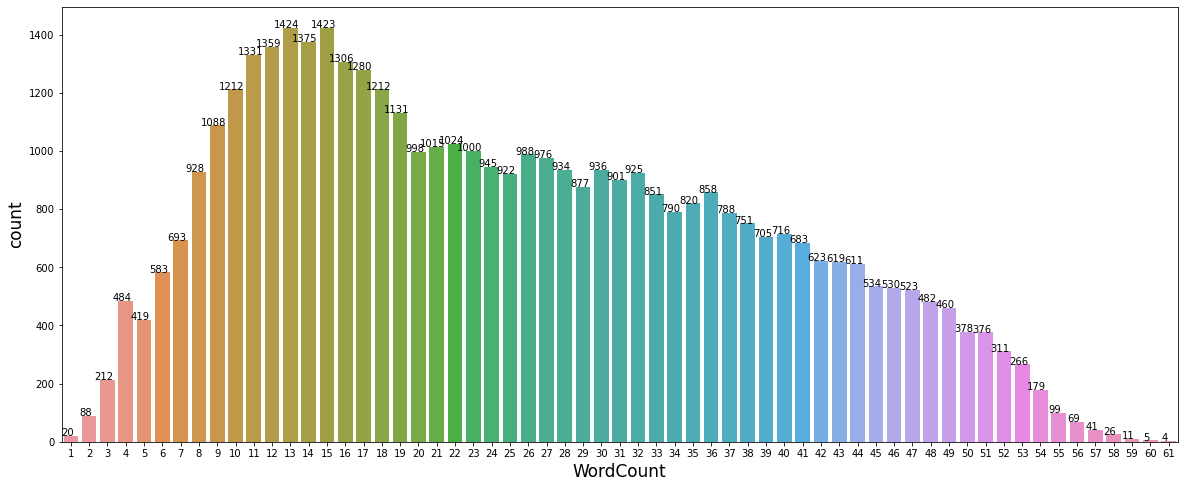

In [13]:
def plot_wordCount(col,data):
    plt.figure(figsize = (20,8))
    ax =sns.countplot(x=col, data=data);
    plt.xlabel("Number of Words",fontsize=17)
    plt.ylabel("Count", fontsize=17)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=10, ha="center")
    sns.countplot(x =col, data = data)

plot_wordCount('WordCount', edaStep.data)


In [14]:
fewWordSent = edaStep.data[edaStep.data['WordCount'] <= 5]['CleanText']

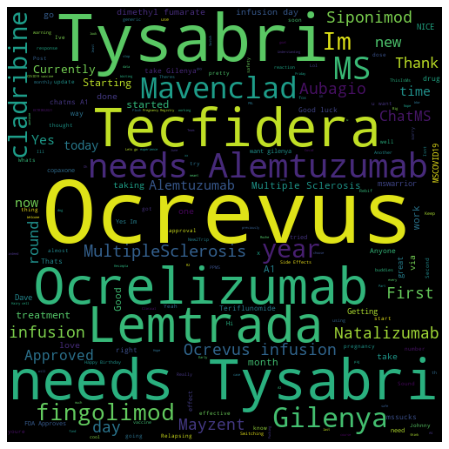

In [15]:
#Create a wordcloud to get a feel of data
stopwords = list(STOPWORDS)
unique_string=(" ").join(fewWordSent)
wordcloud = WordCloud(stopwords = stopwords, width = 500, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


#Looks like there is no much info except drug names

In [16]:
edaStep.remove_shortSent()

Remove Sentences less than 5 words


In [18]:
edaStep.log

['Initial Dataset : 75568',
 'After removing non English Tweets : 58088',
 'After Validating Tweet for Search Term : 56252',
 'After Removing Duplicate Tweets : 43118',
 'After Removing Short Setences : 41895']

<AxesSubplot:>

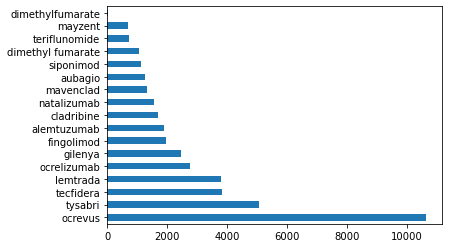

In [25]:
edaStep.data['Drug'].value_counts().plot(kind='barh')

In [32]:
df = edaStep.data
df_train, df_test = train_test_split(df, test_size=0.05)

In [33]:
print(len(df_train),len(df_test))

39800 2095


In [41]:
df_train_dload = df_train['CleanText']
df_train_dload.sample(30000).to_csv("UnlabeledData_MS.csv")

#We are not downloading the entire data given the dataupload restrictions
#df_train.to_csv("UnlabeledData_MS.csv")                           

In [34]:

df_test.to_csv("ManuallyAnnotate_MS.csv")

In [ ]:
#Below is the sequence of steps if we were to execute if on a different list of search terms

df_d2_list = pullDataUsingSnscrape(lupus,log='X')
df_d2 = convertToDataFrame(df_d2_list)


In [38]:
printData('Initial Data Retrieved For Lupus', df_d2)
d2EDA = EDASteps(df_d2,lupus)
d2EDA.main()
d2EDA.remove_shortSent()
df2 = edaStep.data
df2.to_csv("UnlabedData_LU.csv")

Initial Data Retrieved For Lupus 62148
Removing Non English Tweets
Validating Search Term in tweets
Clean the text - Remove emojis,hashtags, extra spaces, specical characters, duplicates, HTML tags


100%|██████████| 42053/42053 [00:01<00:00, 22935.34it/s]


Counting Number of Words


100%|██████████| 41816/41816 [00:00<00:00, 77456.88it/s] 


Remove Sentences less than 5 words


In [39]:
edaStep.log

['Initial Dataset : 75568',
 'After removing non English Tweets : 58088',
 'After Validating Tweet for Search Term : 56252',
 'After Removing Duplicate Tweets : 43118',
 'After Removing Short Setences : 41895']